In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load Data
df = pd.read_csv("C:/Users/Acer Nitro5/Desktop/diabetes.csv")

In [3]:
#EDA
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Data Shape and info
print("Shape of data:", str(df.shape) + "number of rows :"+str(df.shape[0]) + "Number of cols ", str(df.shape[1]))

Shape of data: (768, 9)number of rows :768Number of cols  9


In [5]:
df.info() #look if there is a null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#Check if there is a missing values 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#Duplicated values
df.duplicated().sum()

0

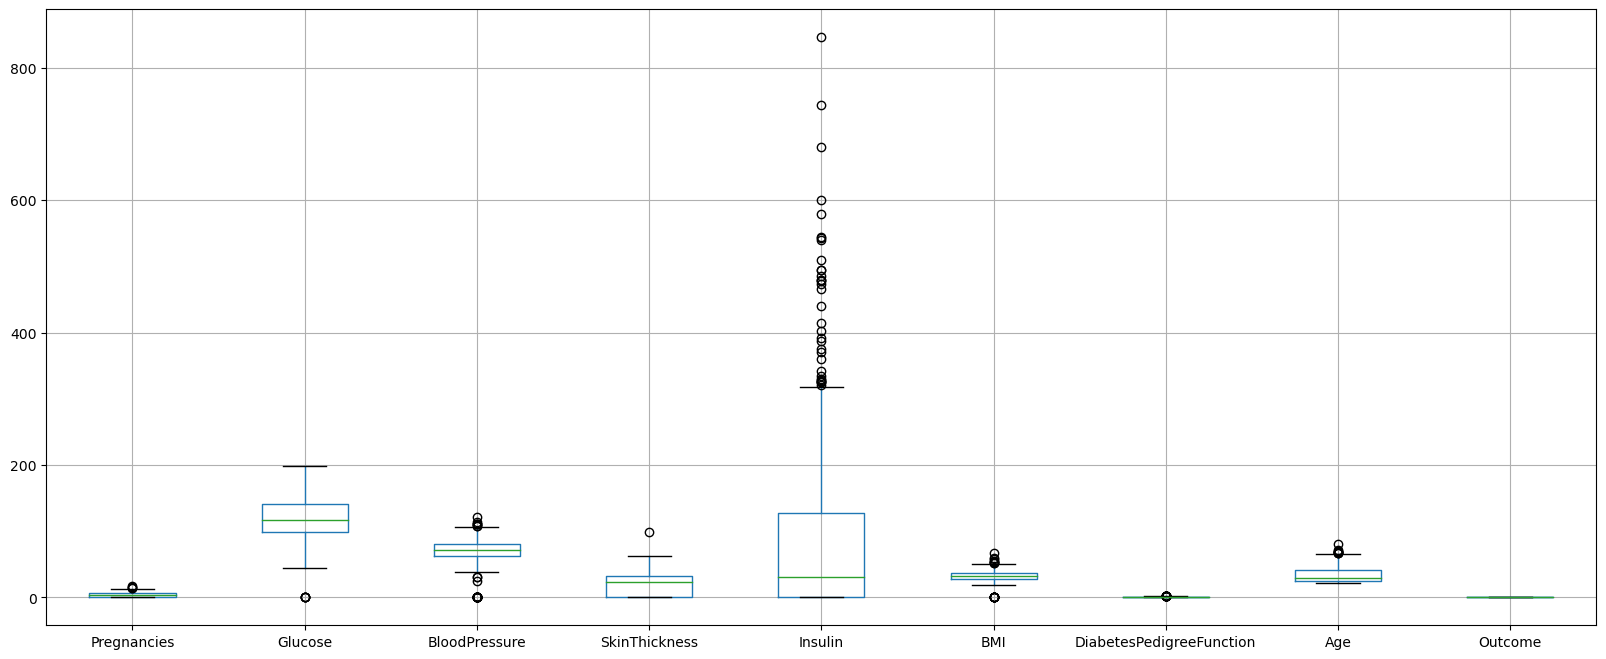

In [9]:
plt.figure(figsize=(20,8))
df.boxplot()
plt.show()

In [10]:
df[df["Glucose"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [11]:
df[df["BloodPressure"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [12]:
df[df["BloodPressure"]==0].count() #35 rows with zero values

Pregnancies                 35
Glucose                     35
BloodPressure               35
SkinThickness               35
Insulin                     35
BMI                         35
DiabetesPedigreeFunction    35
Age                         35
Outcome                     35
dtype: int64

In [13]:
#Replace all zero values to NaN values
df[["Glucose"]] =df[["Glucose"]].replace(0,np.NaN)
df[["BloodPressure"]] =df[["BloodPressure"]].replace(0,np.NaN)
df[["SkinThickness"]] =df[["SkinThickness"]].replace(0,np.NaN)
df[["Insulin"]] =df[["Insulin"]].replace(0,np.NaN)
df[["BMI"]] =df[["BMI"]].replace(0,np.NaN)

In [14]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

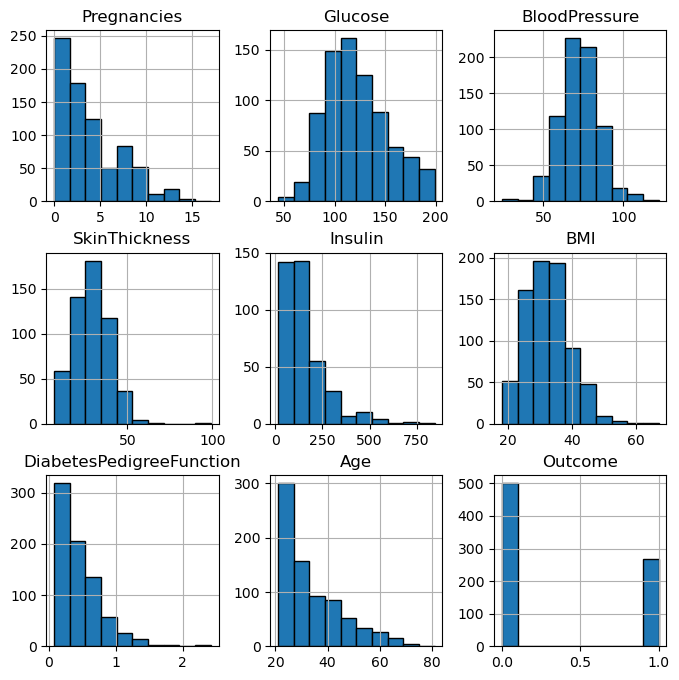

In [15]:
df.hist(figsize=(8, 8), edgecolor='black')
plt.show()

c:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x2000 with 0 Axes>

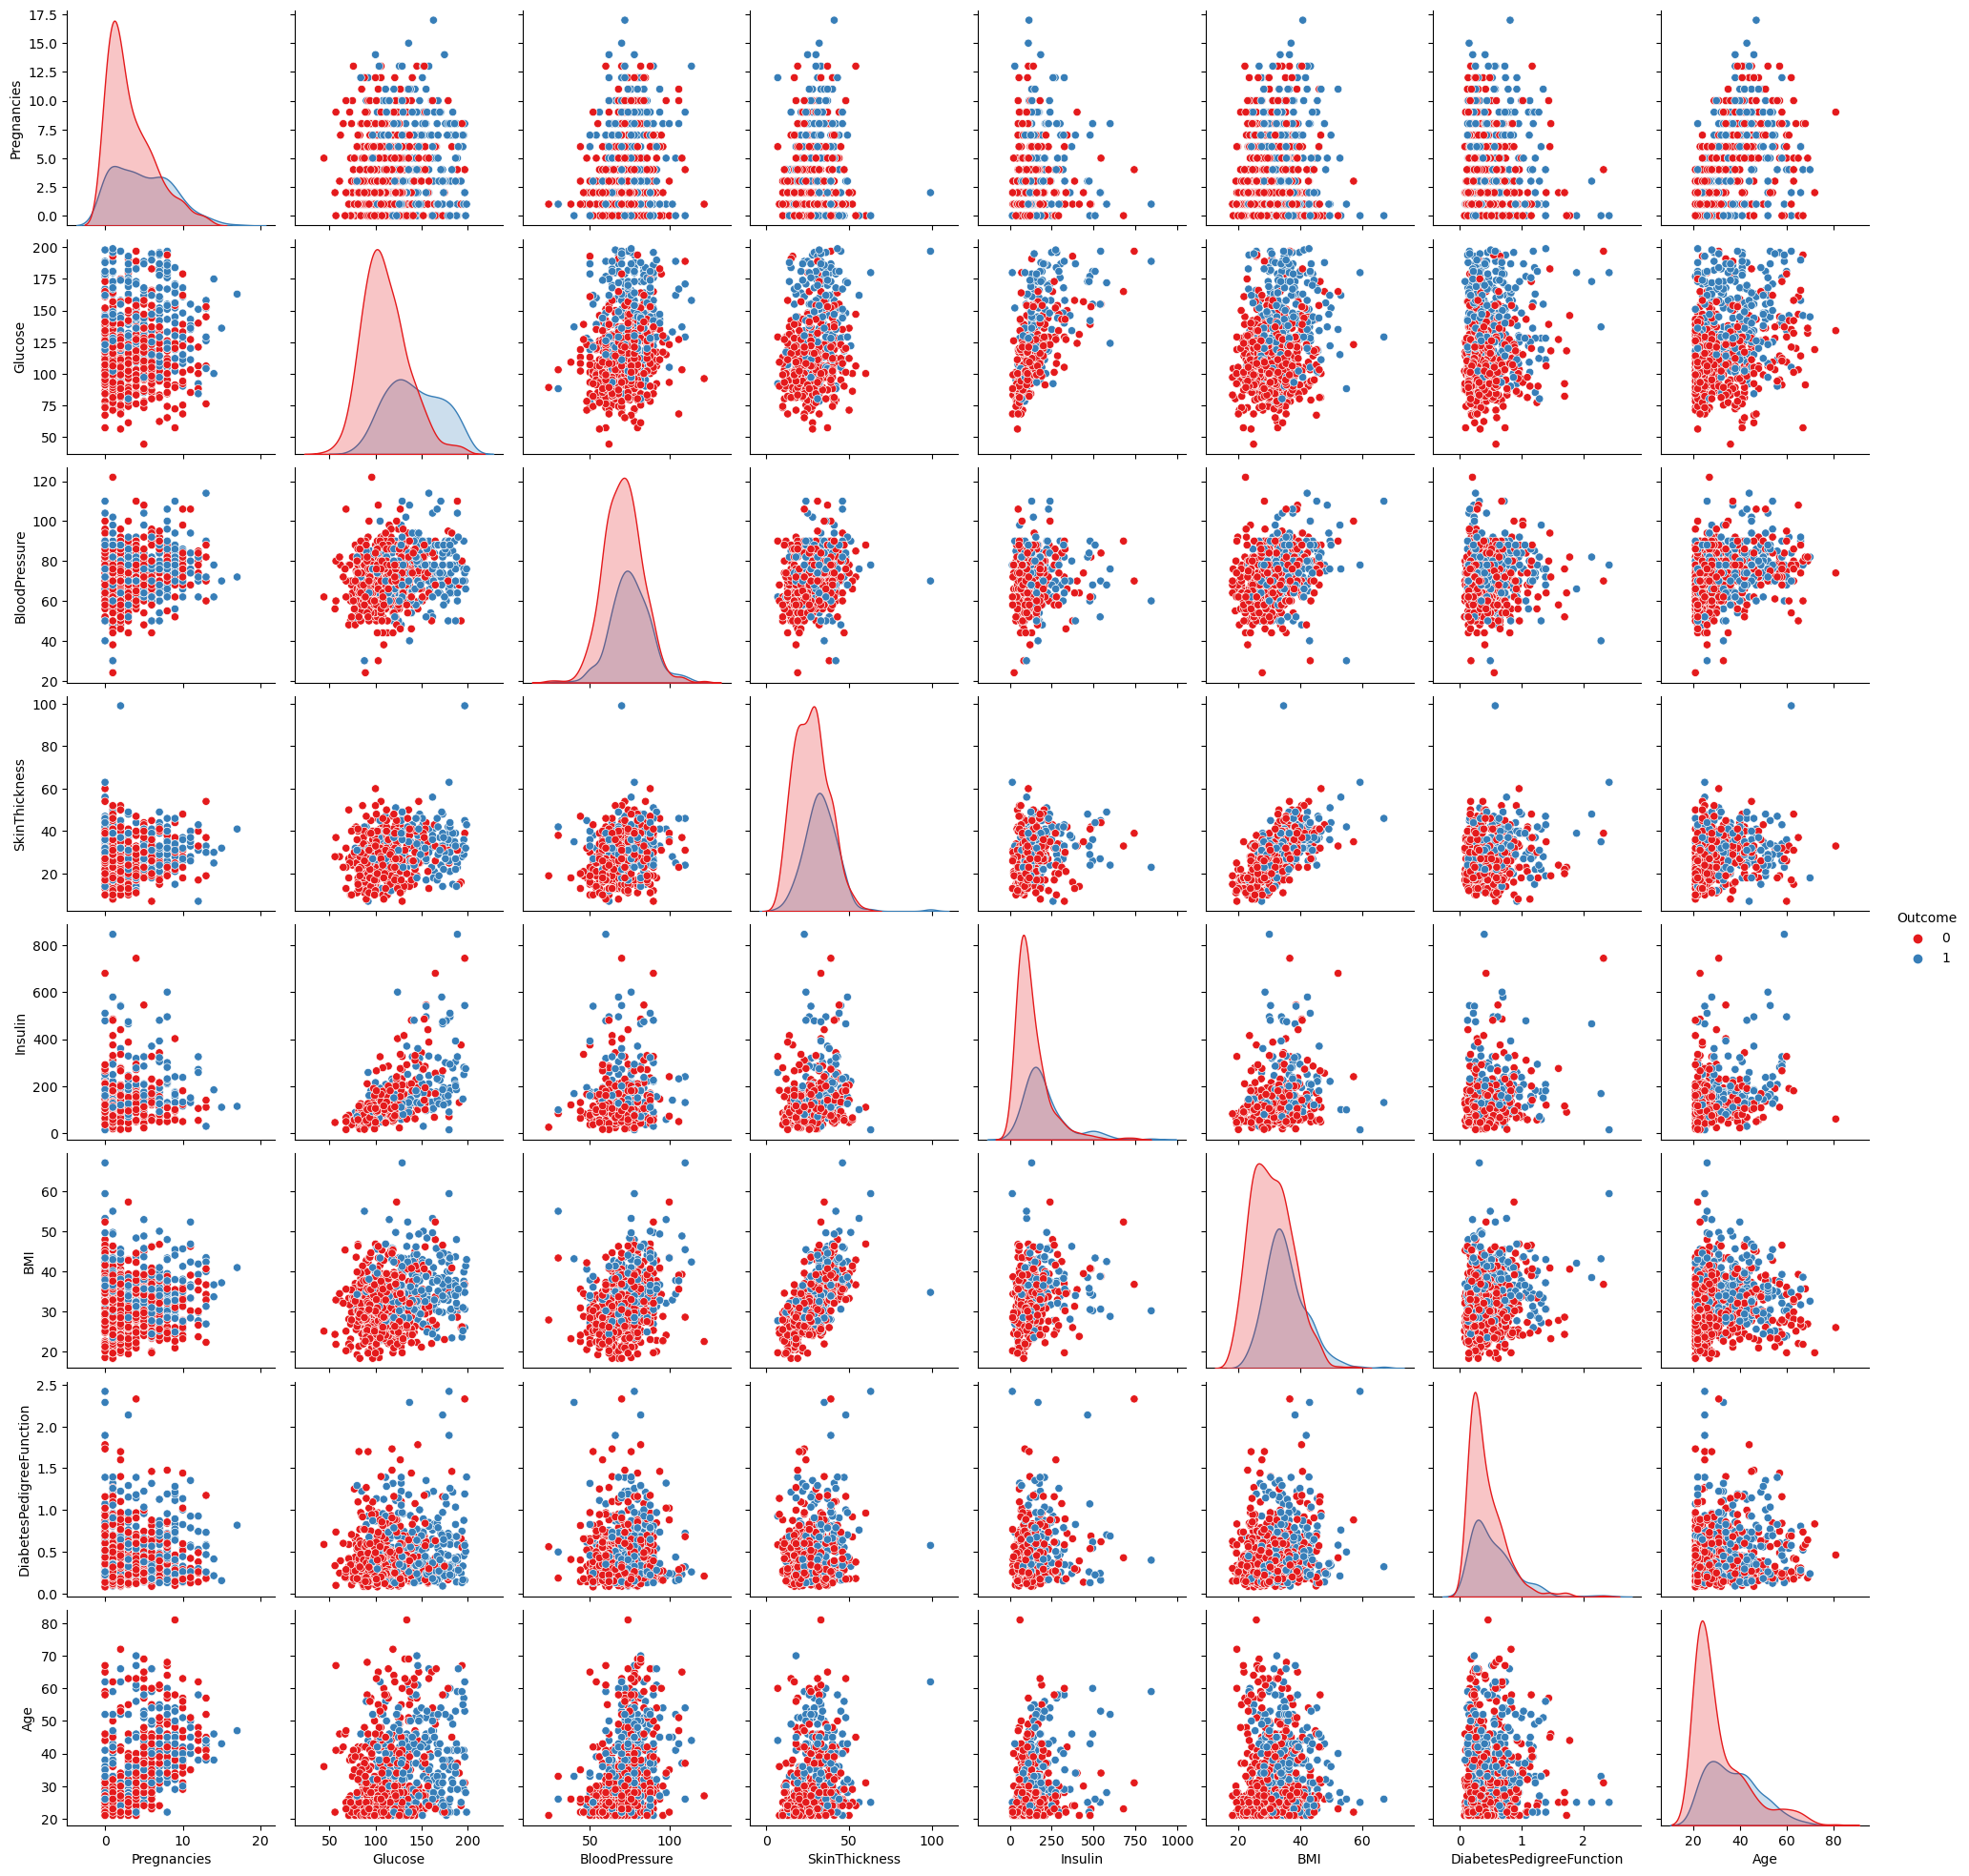

In [16]:
#Visualize data with pairplot
import seaborn as sns
plt.figure(figsize=(20,20))
sns.pairplot(df, hue='Outcome', palette ="Set1")
plt.show()

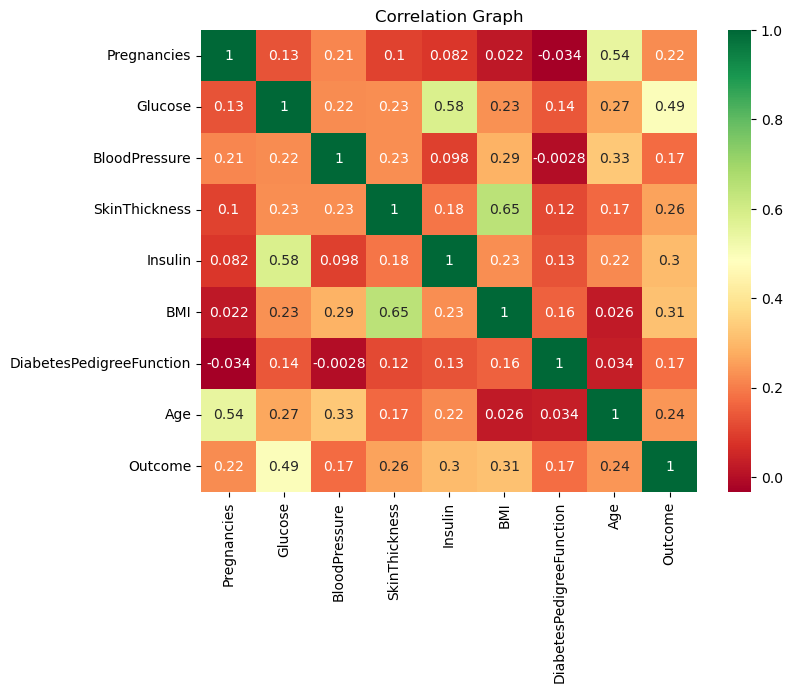

In [17]:
cr = df.corr()

plt.figure(figsize=(8,6))
plt.title("Correlation Graph")
sns.heatmap(cr, annot = True, cmap='RdYlGn')
plt.show()

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


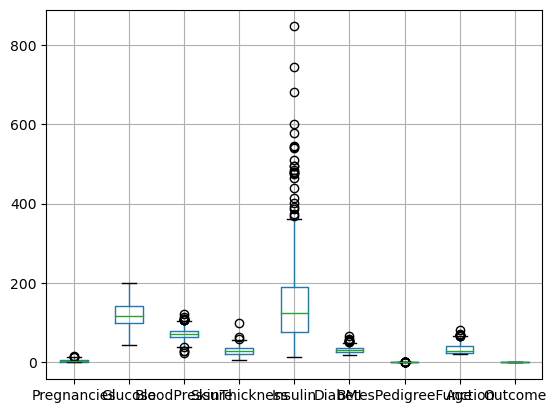

In [19]:
df.boxplot()
column_name = df.columns

In [20]:
#Filling up NaN values with the imputation
df["Glucose"].fillna((df["Glucose"]).mean(), inplace= True) #Change will not take place if Inplace =False
df["BloodPressure"].fillna((df["BloodPressure"]).mean(), inplace= True)
df["SkinThickness"].fillna((df["SkinThickness"]).median(), inplace= True)
df["Insulin"].fillna((df["Insulin"]).median(), inplace= True)
df["BMI"].fillna((df["BMI"]).median(), inplace= True)

In [21]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

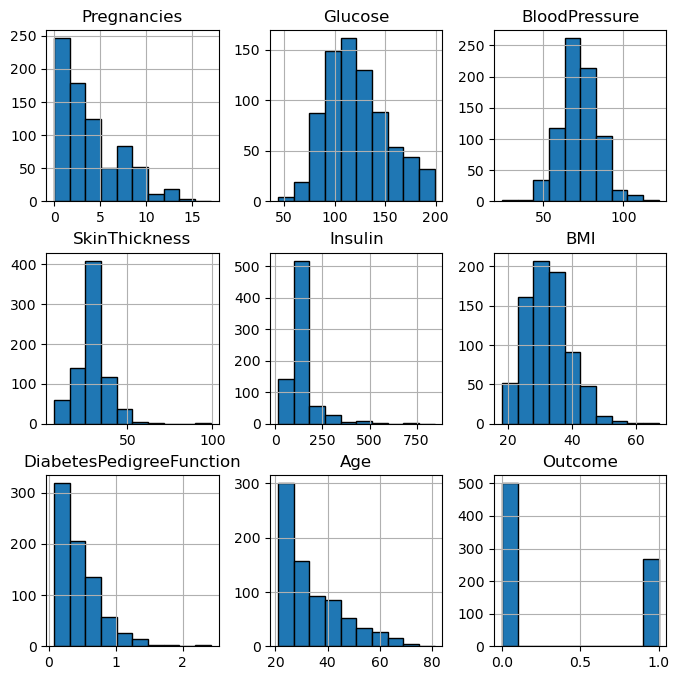

In [22]:
#Plot a histogram to see the distribution of the data
df.hist(figsize=(8,8), edgecolor='black')
plt.show

In [23]:
#scale our features
from sklearn.preprocessing import StandardScaler

X = df.drop("Outcome", axis = 1)
y = df["Outcome"]
#Iniatialize your scaler
SS = StandardScaler()
#Fit transform your trasnfer
X = SS.fit_transform(X)
#convert to DataFrame
X = pd.DataFrame(X)


In [24]:
column_name = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
X.columns = column_name

<Axes: >

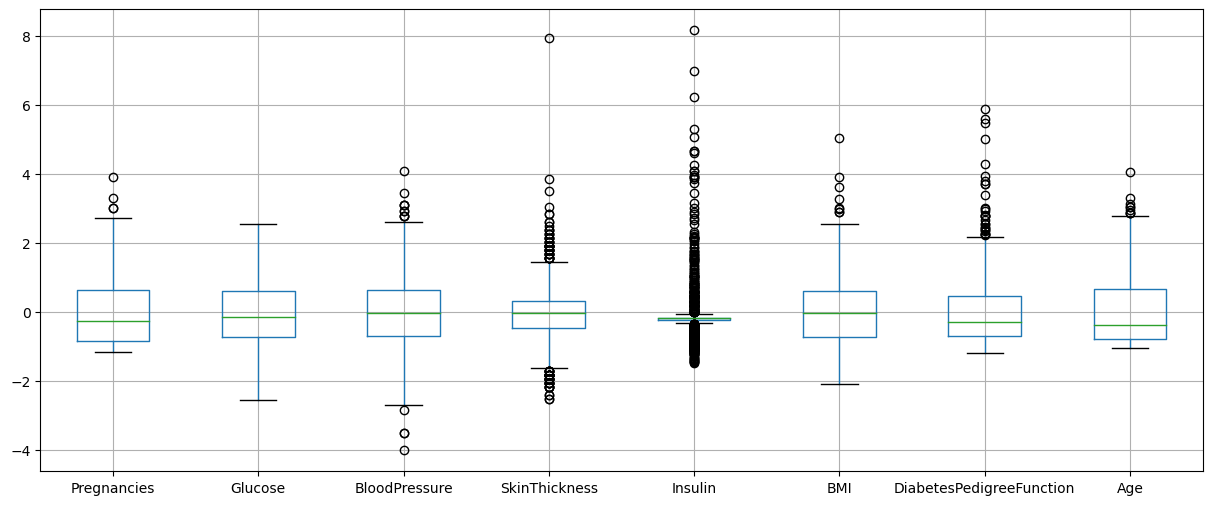

In [25]:
plt.figure(figsize=(15,6))
X.boxplot()

In [26]:
X.head() #first 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [27]:
df[df["Outcome"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
3,1,89.0,66.000000,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.000000,29.0,125.0,25.6,0.201,30,0
7,10,115.0,72.405184,29.0,125.0,35.3,0.134,29,0
10,4,110.0,92.000000,29.0,125.0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.000000,29.0,125.0,22.5,0.142,33,0
763,10,101.0,76.000000,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.000000,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.000000,23.0,112.0,26.2,0.245,30,0


In [28]:
df[df["Outcome"]==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
757,0,123.0,72.0,29.0,125.0,36.3,0.258,52,1
759,6,190.0,92.0,29.0,125.0,35.5,0.278,66,1
761,9,170.0,74.0,31.0,125.0,44.0,0.403,43,1


In [29]:
#Pre-processing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split (X, y, test_size= 0.2, random_state= 16, stratify= y)

In [30]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier

#create an empty bracket
test_scores = []
train_scores = []

for i in range (1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)

    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)

    train_scores.append(train_acc)
    test_scores.append(test_acc)
    print("KNN value =: "+str(i)+
          "Train_score: "+str(train_acc)+
          "Test_score: "+str(test_acc) )


KNN value =: 1Train_score: 1.0Test_score: 0.7012987012987013
KNN value =: 2Train_score: 0.8501628664495114Test_score: 0.7077922077922078
KNN value =: 3Train_score: 0.8501628664495114Test_score: 0.7337662337662337
KNN value =: 4Train_score: 0.8257328990228013Test_score: 0.7142857142857143
KNN value =: 5Train_score: 0.8338762214983714Test_score: 0.6883116883116883
KNN value =: 6Train_score: 0.8143322475570033Test_score: 0.7337662337662337
KNN value =: 7Train_score: 0.8175895765472313Test_score: 0.7662337662337663
KNN value =: 8Train_score: 0.7964169381107492Test_score: 0.7272727272727273
KNN value =: 9Train_score: 0.8110749185667753Test_score: 0.7467532467532467
KNN value =: 10Train_score: 0.7996742671009772Test_score: 0.7402597402597403
KNN value =: 11Train_score: 0.8192182410423453Test_score: 0.7337662337662337
KNN value =: 12Train_score: 0.8061889250814332Test_score: 0.7337662337662337
KNN value =: 13Train_score: 0.8094462540716613Test_score: 0.7467532467532467
KNN value =: 14Train_sc

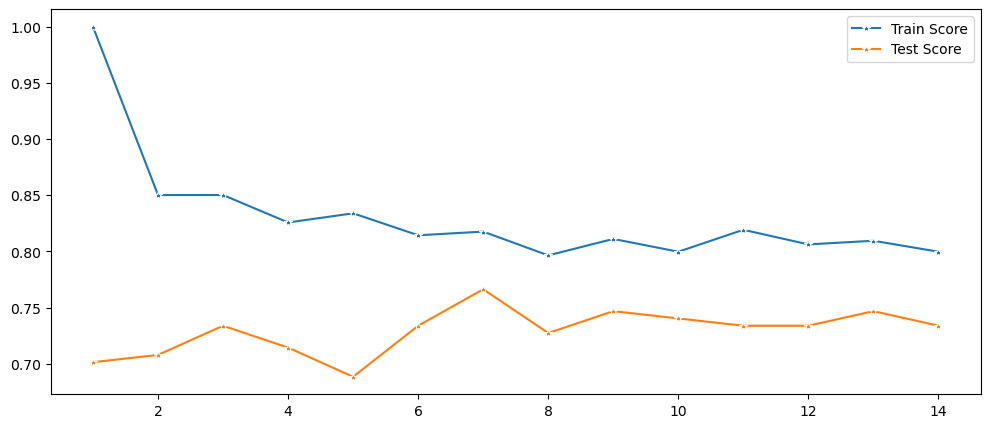

In [31]:
#plt.figure

plt.figure(figsize=(12,5))
p = sns.lineplot(x=list(range(1,15)), y=train_scores, marker = '*', label = 'Train Score')
p = sns.lineplot(x=list(range(1,15)), y=test_scores, marker = '*', label = 'Test Score')

In [32]:
#setup a knn Classifier with chosen k neighbors
knn = KNeighborsClassifier(7)
knn.fit(X_train, y_train)

test_acc = knn.score(X_test, y_test)

print(test_acc)

0.7662337662337663


Text(50.722222222222214, 0.5, 'Predicted label')

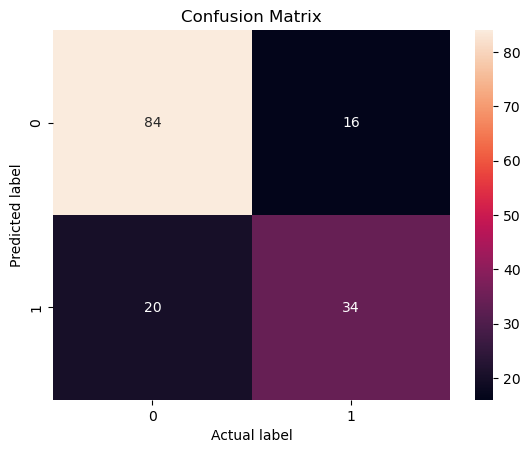

In [33]:
#model Peformance
#import confusion_matrix

from sklearn.metrics import confusion_matrix
#lets get the predictions using the classifier we had fit above

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [34]:
print("True Positive", cm[0][0])
print("False Negative", cm[0][1])
print("False Positive", cm[1][0])
print("False Negative", cm[1][1])

True Positive 84
False Negative 16
False Positive 20
False Negative 34


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       100
           1       0.68      0.63      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



In [36]:
#Fine Tuning Model

from sklearn.model_selection import GridSearchCV

grid_params= {'n_neighbors':[5,7,9,13],
              'weights' : ['uniform', 'distance'],
              'metric': ['minkowski','eunclidean', 'manhattan'],
              'leaf_size': list(range(1,20,3))
}

#iniatialize GS

GS = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, cv =5, n_jobs= -1)  

In [37]:
#fit the model on our train set
result= GS.fit(X_train, y_train)
print("The KNN best parameters : "+str(result.best_params_) +"has the score of", result.best_score_ )

Fitting 5 folds for each of 168 candidates, totalling 840 fits


The KNN best parameters : {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'distance'}has the score of 0.7785819005731042


c:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
280 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Anaconda\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Anaconda\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_param

In [38]:
#Perform evaluation of model using the best hyperparameter chosen

#setup a knn classifier with chosen k neighbors
knn = KNeighborsClassifier(leaf_size= 1, metric= 'euclidean', n_neighbors= 5, weights= 'uniform')
knn.fit(X_train, y_train)

test_acc = knn.score(X_test, y_test)
print(test_acc)

0.6883116883116883


Text(50.722222222222214, 0.5, 'Predicted label')

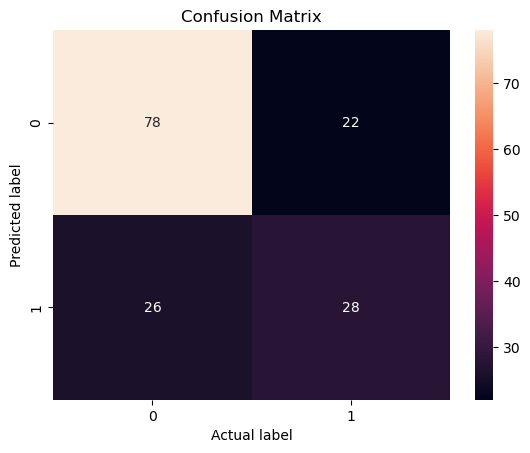

In [39]:
from sklearn.metrics import confusion_matrix
#lets get the predictions using the classifier we had fit above

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       100
           1       0.56      0.52      0.54        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.68      0.69      0.69       154



In [41]:
#make a pipeline for ss and knn
from sklearn.pipeline import Pipeline

pipeline_ss_knn = Pipeline([('ss', StandardScaler()), ('knn', KNeighborsClassifier(metric = 'minkowski', n_neighbors = 13, weights = 'distance'))])

#fit the model
pipeline_ss_knn.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=13, weights='distance'))])

In [42]:
#save the model
import pickle
import os
MODEL_PATH = os.path.join(os.getcwd(), 'diabetesmodel.pkl')

with open (MODEL_PATH, 'wb') as file:
    pickle.dump(pipeline_ss_knn, file)

In [43]:
with open (MODEL_PATH, 'rb') as file:
    diabetes_model = pickle.load(file)

diabetes_model.fit(X_train, y_train)
load_y_pred = diabetes_model.predict(X_test)

In [44]:
#score the loaded model
diabetes_model.score(X_test, y_test)

0.7337662337662337

In [45]:
#import streamlit
import streamlit as st
import os
import pandas as pd
import pickle

def load_model():
    with open('diabetesmodel.pkl', 'rb') as f:
        model = pickle.load(f)
    return model

def main():
    st.title("Diabetes Detection App")
    st.write("This app allows you to make predictions about diabetes.")

    model = load_model()

    st.subheader("Make a prediction of whether a person has diabetes")
    st.write("Enter the details of a person.")

    Pregnancies = st.number_input("Number of Pregnancies", min_value=0, max_value=50)
    Glucose = st.number_input("Glucose level", min_value=44.0, max_value=200.0)
    BloodPressure = st.number_input("Blood Pressure", min_value=24.0, max_value=122.0)
    SkinThickness = st.number_input("Skin Thickness", min_value=7.0, max_value=100.0)
    Insulin = st.number_input("Insulin", min_value=14.0, max_value=846.0)
    BMI = st.number_input("BMI", min_value=18.0, max_value=67.0)
    DiabetesPedigreeFunction = st.number_input("Diabetes Pedigree Function", min_value=0.0, max_value=2.42)
    Age = st.number_input("Age", min_value=0, max_value=200)

    if st.button("Predict"):
        features = [[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]]

        prediction = model.predict(features)
        if prediction[0] == 1:
            st.write("The person is most likely having Diabetes")
        else:
            st.write("The person is most likely not having Diabetes")

if __name__ == "__main__":
    main()

2023-10-26 07:59:32.379 
  command:

    streamlit run c:\Anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [46]:
#create a webpage for user input data